# Preparation
The goal of this case study is to classify the data provided using logistic regression, decision tree, random forest and extra random forest. The resulting classified data will then be compared through the classification report, confusion matrix, accuracy score, and if applicable, roc_auc_score.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
df = pd.read_csv('C:/Users/Admin/Desktop/Project/lithium-ion batteries.csv')
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


To prepare the dataset, missing data is visually checked by using a heatmap available through the Seaborn library.

<Axes: >

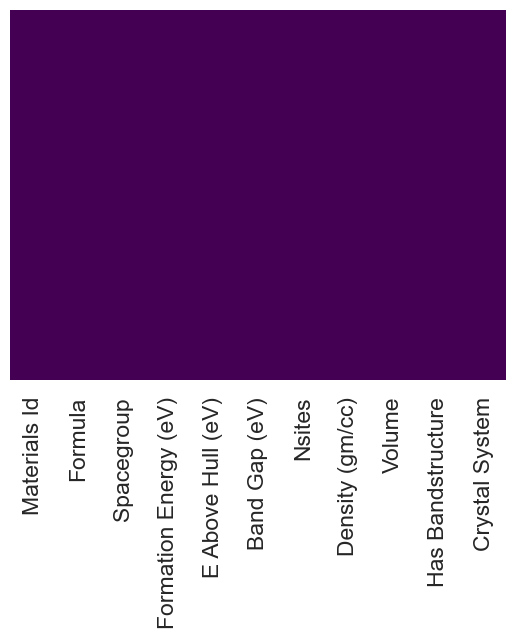

In [87]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Generate and check the pairplot of the dataframe.

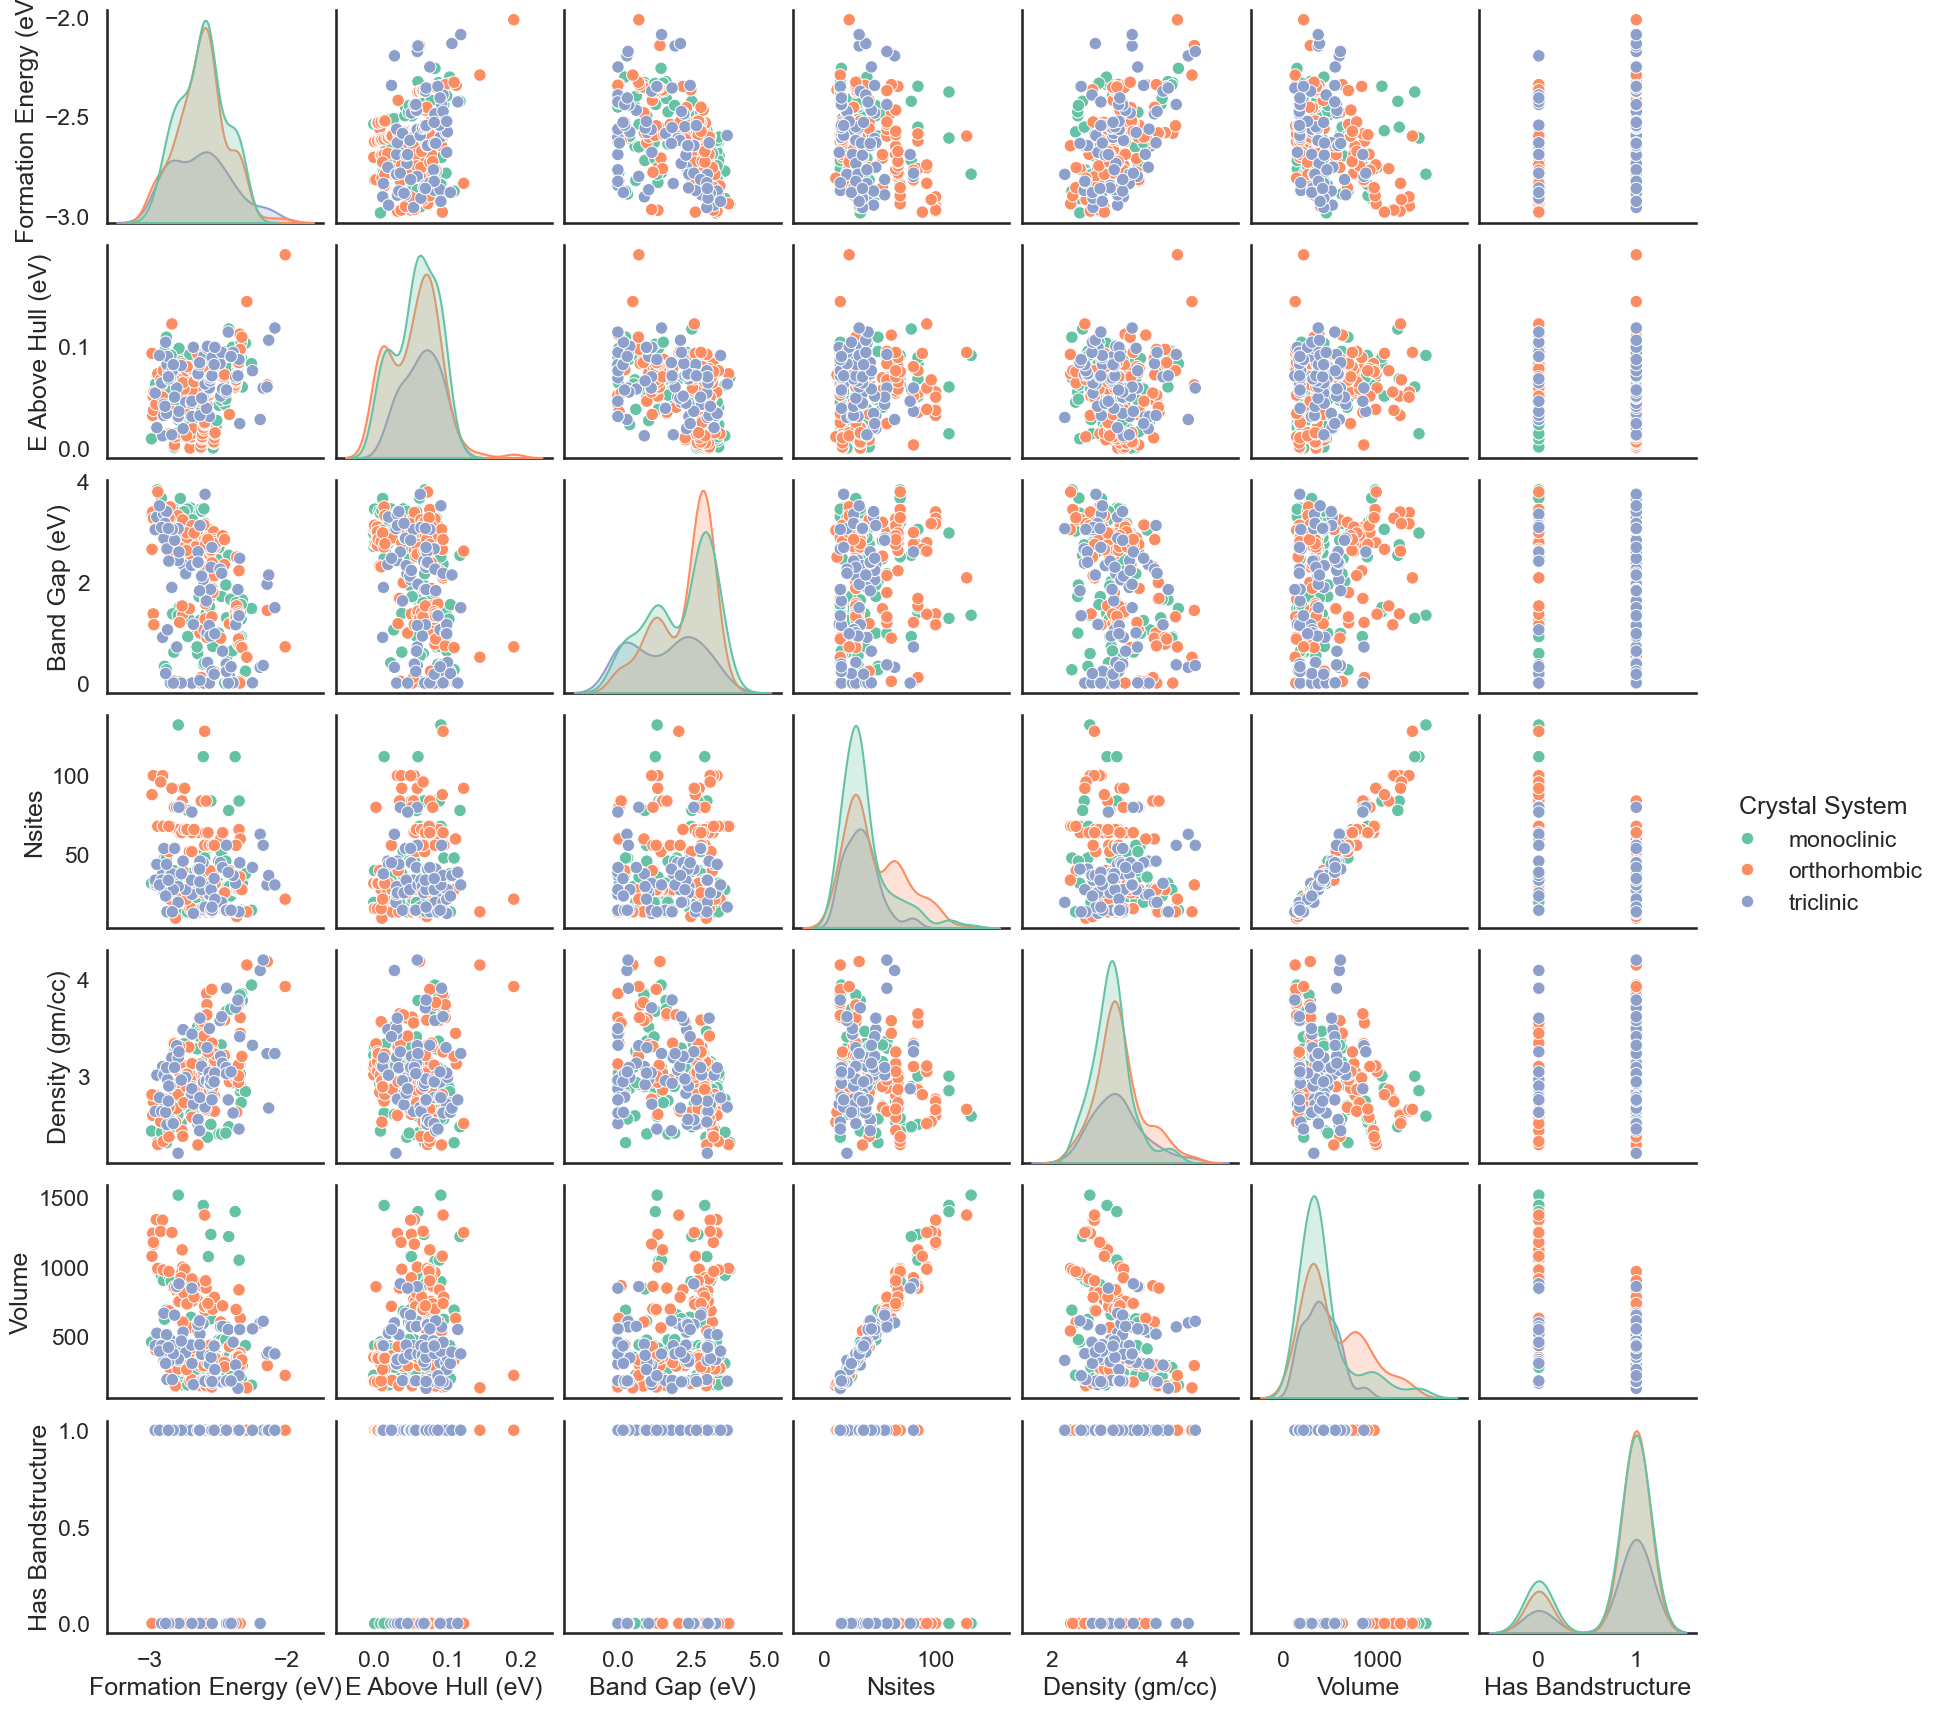

In [88]:
sns.pairplot(df,hue='Crystal System',palette='Set2')

The use of the pairplot shows the relationship of each variable to the Crystal Systems of Li-ion batteries. With this, regression analysis is used wherein the variables Nsites and Volume showed an upward trend of regression.

Columns with variables not needed in building models such as materials id, formula, and space group are removed to clean the dataset.

In [89]:
df.drop(['Materials Id','Formula','Spacegroup'],
        axis=1,inplace=True)
df.head()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [90]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Formation Energy (eV)  339 non-null    float64
 1   E Above Hull (eV)      339 non-null    float64
 2   Band Gap (eV)          339 non-null    float64
 3   Nsites                 339 non-null    int64  
 4   Density (gm/cc)        339 non-null    float64
 5   Volume                 339 non-null    float64
 6   Has Bandstructure      339 non-null    bool   
 7   Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 19.0+ KB


Generate a frequency distribution of the Crystal Systems and whether or not it has a bandstructure.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11316\754593760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Crystal System',


<Axes: xlabel='Crystal System', ylabel='count'>

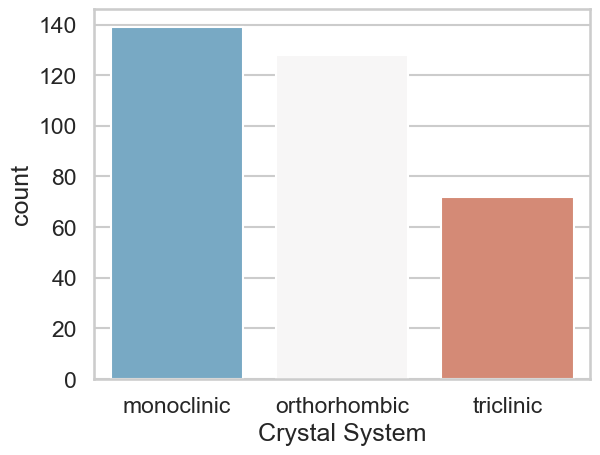

In [91]:
sns.set_style('whitegrid')
sns.countplot(x='Crystal System',
              data=df,palette='RdBu_r')

<Axes: xlabel='Crystal System', ylabel='count'>

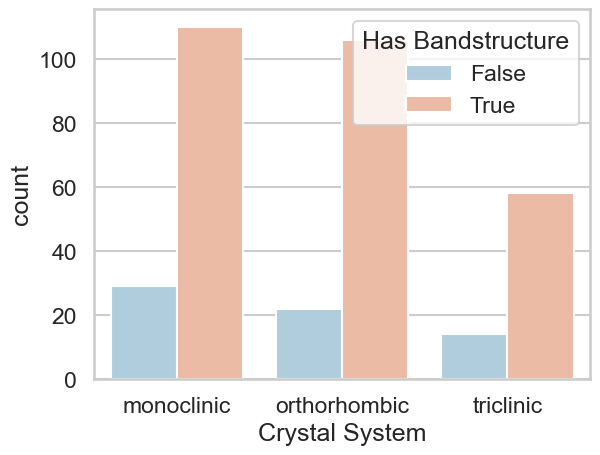

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='Crystal System',hue='Has Bandstructure',data=df,palette='RdBu_r')

# Logistic Regression
Logistic Regression is used when the dependent variable or target is categorical. There are different types of logistic regression such as binary, multinomial, and ordinal (Swaminathan, 2018). Binary logistic regression is used when the categorical response has only two possible outcomes. Multinomial logistic regression is used when there are three or more categories used without ordering. Ordinal logistic regression is used when there are three or more categories with ordering.

Build a Logistic Regression model. Split the data into a training set and a test set.

In [93]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df.drop('Crystal System',axis=1), 
                                                    df['Crystal System'], test_size=0.30, 
                                                    random_state=101)

The test size is set to 30 leaving the training set to be at 70. Random state is set to 101.

Train the model.

In [94]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict the values for the testing data and print a classification report to obtain the precision, recall and f1-score.

In [95]:
lr_predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,lr_predictions))

              precision    recall  f1-score   support

  monoclinic       0.46      0.76      0.57        41
orthorhombic       0.68      0.41      0.52        41
   triclinic       0.40      0.20      0.27        20

    accuracy                           0.51       102
   macro avg       0.51      0.46      0.45       102
weighted avg       0.54      0.51      0.49       102



Print the accuracy score.

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
print(accuracy_score(y_test, lr_predictions))

0.5098039215686274


Show the confusion matrix of the prediction.

In [97]:
confusion_matrix(y_test, lr_predictions)

array([[31,  5,  5],
       [23, 17,  1],
       [13,  3,  4]], dtype=int64)

<Axes: xlabel='Predicted', ylabel='Actual'>

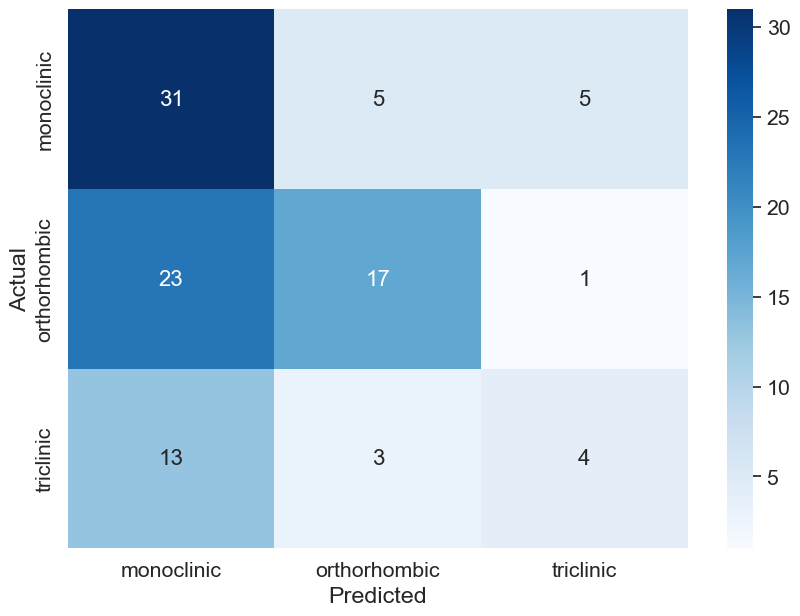

In [98]:
data = confusion_matrix(y_test, lr_predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(lr_predictions))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

The values of precision, recall, and f1 score are obtained through a classification report. Output shows the precision, recall, and f1 score for the Crystal Systems of Li-ion batteries as well as its accuracy score. The confusion matrix of the prediction is shown which can be used to solve the precision, recall, f1 score, and accuracy mathematically.

# Decision Tree
Decision Tree can be used to represent decisions and decision making visually and explicitly (Gupta, 2017). The name is taken from the tree-like model of decisions; however, the root is at the very top. The root is split into two decisions or leaves depending on the condition or internal node. In general, Decision Tree algorithms are referred to as Classification and Regression Trees (CART).

Build the Decision Tree model and split the data into a training set and test set.

In [99]:
from sklearn.model_selection import train_test_split

X = df.drop('Crystal System',axis=1)
y = df['Crystal System']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

The test size is set to 30 leaving the train set at 70.

Train the model.

In [100]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dtree.tree_.node_count, dtree.tree_.max_depth

(125, 17)

The Decision Tree Classifier is used to obtain the count of nodes and maximum depth of the decision tree.

Predict the values for the testing data and generate the classification report to check the precision, recall and f1-score.

In [101]:
dt_predictions = dtree.predict(X_test)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

  monoclinic       0.58      0.62      0.60        40
orthorhombic       0.59      0.59      0.59        37
   triclinic       0.45      0.40      0.43        25

    accuracy                           0.56       102
   macro avg       0.54      0.54      0.54       102
weighted avg       0.56      0.56      0.56       102



Generate the confusion matrix and the accuracy score of the prediction.

In [103]:
print(confusion_matrix(y_test,dt_predictions))

[[25  8  7]
 [10 22  5]
 [ 8  7 10]]


In [104]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])

features

['E Above Hull (eV)',
 'Band Gap (eV)',
 'Nsites',
 'Density (gm/cc)',
 'Volume',
 'Has Bandstructure',
 'Crystal System']

The values of precision, recall, and f1 score are obtained through a classification report. Output shows the precision, recall, and f1 score for the Crystal Systems of Li-ion batteries as well as its accuracy score. The confusion matrix of the prediction is shown which can be used to solve the precision, recall, f1 score, and accuracy mathematically.

# Random Forest
Random Forest is a supervised learning algorithm. The forest the algorithm builds is an ensemble of decision trees, usually with the bagging method (Donges, 2020). Bagging is a combination of learning models that increases the overall result. A random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. It can be used for both classification and regression problems.

Build the Random Forest model and split the data into a training set and test set.

In [105]:
from sklearn.model_selection import train_test_split

X = df.drop('Crystal System',axis=1)
y = df['Crystal System']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train the random forest model and predict the class of the Crystal Systems.

In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rf_predictions = rfc.predict(X_test)

The test size is set to 30 leaving the train set at 70. The Random Forest Classifier is imported from sklearn and the estimators are set to 200.

Generate a classification report to obtain the precision, recall and f1-score of the model.

In [107]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

  monoclinic       0.45      0.63      0.52        35
orthorhombic       0.71      0.58      0.64        43
   triclinic       0.56      0.42      0.48        24

    accuracy                           0.56       102
   macro avg       0.57      0.54      0.55       102
weighted avg       0.59      0.56      0.56       102



Generate the confusion matrix and the accuracy score of the model.

In [108]:
print(confusion_matrix(y_test,rf_predictions))

[[22  8  5]
 [15 25  3]
 [12  2 10]]


In [109]:
print(accuracy_score(y_test, rf_predictions))

0.5588235294117647


The values of precision, recall, and f1 score are obtained through a classification report. Output shows the precision, recall, and f1 score for the Crystal Systems of Li-ion batteries as well as its accuracy score. The confusion matrix of the prediction is shown which can be used to solve the precision, recall, f1 score, and accuracy mathematically.

# Extra Random Forest
Extra Random Forest is like a random forest and is also known as Extremely Randomized Trees. In an extra random forest, the features and splits are selected at random and it is less computationally expensive than a random forest (Ceballos, 2019).

Decision trees show high variance, random forests show medium variance and extra random forest show low variance.

Build the Extra Random Forest model and split the data into a training set and test set.

In [110]:
from sklearn.model_selection import train_test_split

X = df.drop('Crystal System',axis=1)
y = df['Crystal System']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train the model and predict the values for the testing data.

In [111]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=200)
etc.fit(X_train,y_train)
erf_predictions=etc.predict(X_test)

The test size is set to 30 leaving the train set at 70. The Extra Trees Classifier is imported from sklearn and the estimators are set to 200.

Generate the classification report to obtain the precision, recall and f1-score of the model.

In [112]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score
print(classification_report(y_test,erf_predictions))

              precision    recall  f1-score   support

  monoclinic       0.70      0.61      0.65        46
orthorhombic       0.66      0.73      0.69        37
   triclinic       0.52      0.58      0.55        19

    accuracy                           0.65       102
   macro avg       0.63      0.64      0.63       102
weighted avg       0.65      0.65      0.65       102



Generate the confusion matrix and accuracy score of the model.

In [113]:
print(confusion_matrix(y_test,erf_predictions))

[[28 11  7]
 [ 7 27  3]
 [ 5  3 11]]


In [114]:
print(accuracy_score(y_test, erf_predictions))

0.6470588235294118


The values of precision, recall, and f1 score are obtained through a classification report. Output shows the precision, recall, and f1 score for the Crystal Systems of Li-ion batteries as well as its accuracy score. The confusion matrix of the prediction is shown which can be used to solve the precision, recall, f1 score, and accuracy mathematically.

# K Nearest Neighbors (KNN)
KNN is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (Muhajir, 2019).The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points (Gandhi, 2018). To separate the two classes of data points, there are many possible hyperplanes that could be chosen. The goal is to find a plane that has a maximum margin.

Build the K Nearest Neighbors model and split the data into a training set and test set.

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()

In [117]:
scaler.fit(df.drop('Crystal System',axis=1))

StandardScaler()

In [118]:
scaled_features = scaler.transform(df.drop('Crystal System',axis=1))

In [119]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure
0,-0.447048,-1.722253,1.272374,-0.988690,0.025455,-0.989769,0.487059
1,-0.430703,-1.656286,0.735721,-0.296020,-0.164107,-0.350714,0.487059
2,-0.861132,-1.524351,1.448190,-0.469187,-0.630939,-0.567989,0.487059
3,-0.904720,-1.491367,0.860909,-0.036268,-0.215034,-0.108070,0.487059
4,-0.708575,-1.392416,0.458650,-0.122852,0.990242,-0.159045,0.487059


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Crystal System'],
                                                    test_size=0.30)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
knn = KNeighborsClassifier(n_neighbors=1)

In [124]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [125]:
pred = knn.predict(X_test)

Evaluate the KNN model.

In [126]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [127]:
print(confusion_matrix(y_test,pred))

[[27  8  1]
 [16 28  2]
 [10  3  7]]


In [128]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  monoclinic       0.51      0.75      0.61        36
orthorhombic       0.72      0.61      0.66        46
   triclinic       0.70      0.35      0.47        20

    accuracy                           0.61       102
   macro avg       0.64      0.57      0.58       102
weighted avg       0.64      0.61      0.60       102



Choose a K value. Create a method to pick a good value of K.

In [129]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Create a visualization to compare the error rate and k value.

Text(0, 0.5, 'Error Rate')

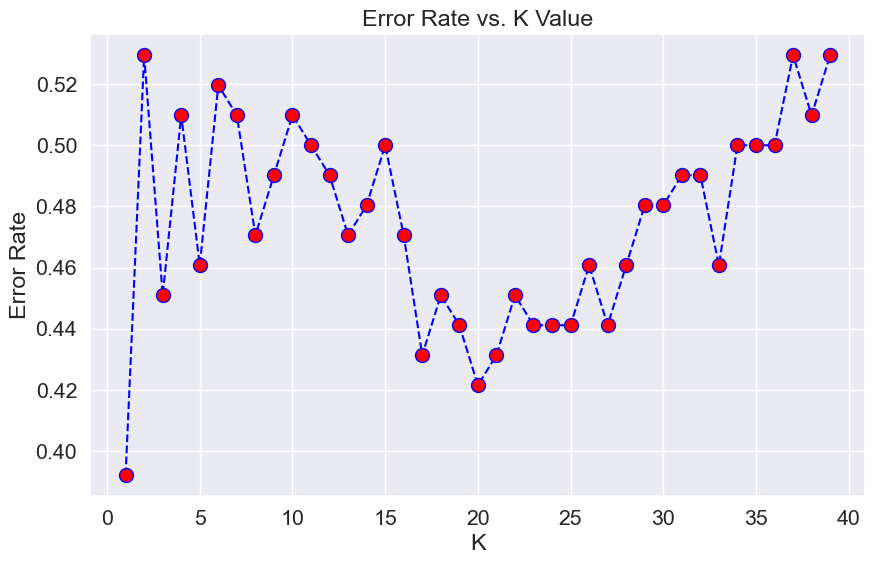

In [130]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [131]:
# K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[27  8  1]
 [16 28  2]
 [10  3  7]]


              precision    recall  f1-score   support

  monoclinic       0.51      0.75      0.61        36
orthorhombic       0.72      0.61      0.66        46
   triclinic       0.70      0.35      0.47        20

    accuracy                           0.61       102
   macro avg       0.64      0.57      0.58       102
weighted avg       0.64      0.61      0.60       102



In [132]:
#K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[28  8  0]
 [17 29  0]
 [16  4  0]]


              precision    recall  f1-score   support

  monoclinic       0.46      0.78      0.58        36
orthorhombic       0.71      0.63      0.67        46
   triclinic       0.00      0.00      0.00        20

    accuracy                           0.56       102
   macro avg       0.39      0.47      0.41       102
weighted avg       0.48      0.56      0.50       102



C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Fit the K-nearest neighbors model again with n_neighbors=3 but this time use distance for the weights. Calculate the accuracy using the function you created above.

In [133]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5784313725490197


Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (p=1) i.e. Manhattan Distance.

In [134]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5392156862745098


Fit a K-nearest neighbors model using values of k (n_neighbors) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (p) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of k used from each of these fits in a list or dictionary. Plot (or view the table of) the accuracy vs k. What do you notice happens when k=1?

In [135]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 30):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

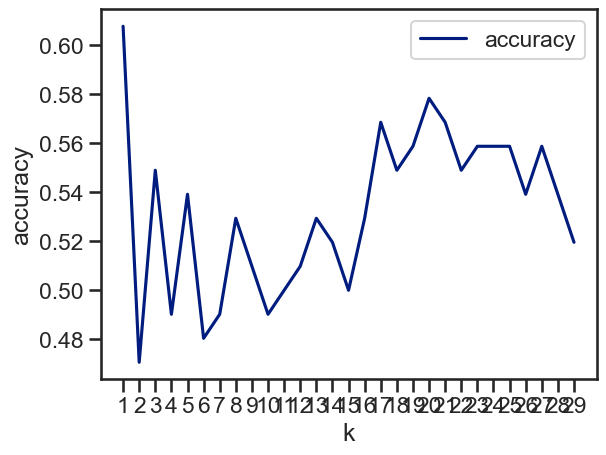

In [136]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 30));


# Support Vector Machines
Build the Support Vector Machines model and split the data into a training set and test set.

In [137]:
df

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


In [138]:
df.describe()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,-2.616950,0.058215,2.079740,38.837758,2.984003,467.765619
std,0.183809,0.030363,1.087968,23.133142,0.353968,292.674559
min,-2.985000,0.000000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,0.035500,1.265500,26.000000,2.760500,286.381500
50%,-2.605000,0.062000,2.499000,31.000000,2.947000,358.537000
75%,-2.525500,0.081500,2.968000,52.000000,3.106000,601.696500
max,-2.012000,0.190000,3.823000,132.000000,4.201000,1518.850000


In [139]:
y = (df['Crystal System'] == 'monoclinic').astype(int)
fields = list(df.columns[:-1])
correlations = df[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Density (gm/cc)         -0.154916
Nsites                  -0.105014
Volume                  -0.082392
Has Bandstructure       -0.035773
E Above Hull (eV)       -0.013834
Formation Energy (eV)    0.006438
Band Gap (eV)            0.040440
dtype: float64

Create a pairplot for the dataset.

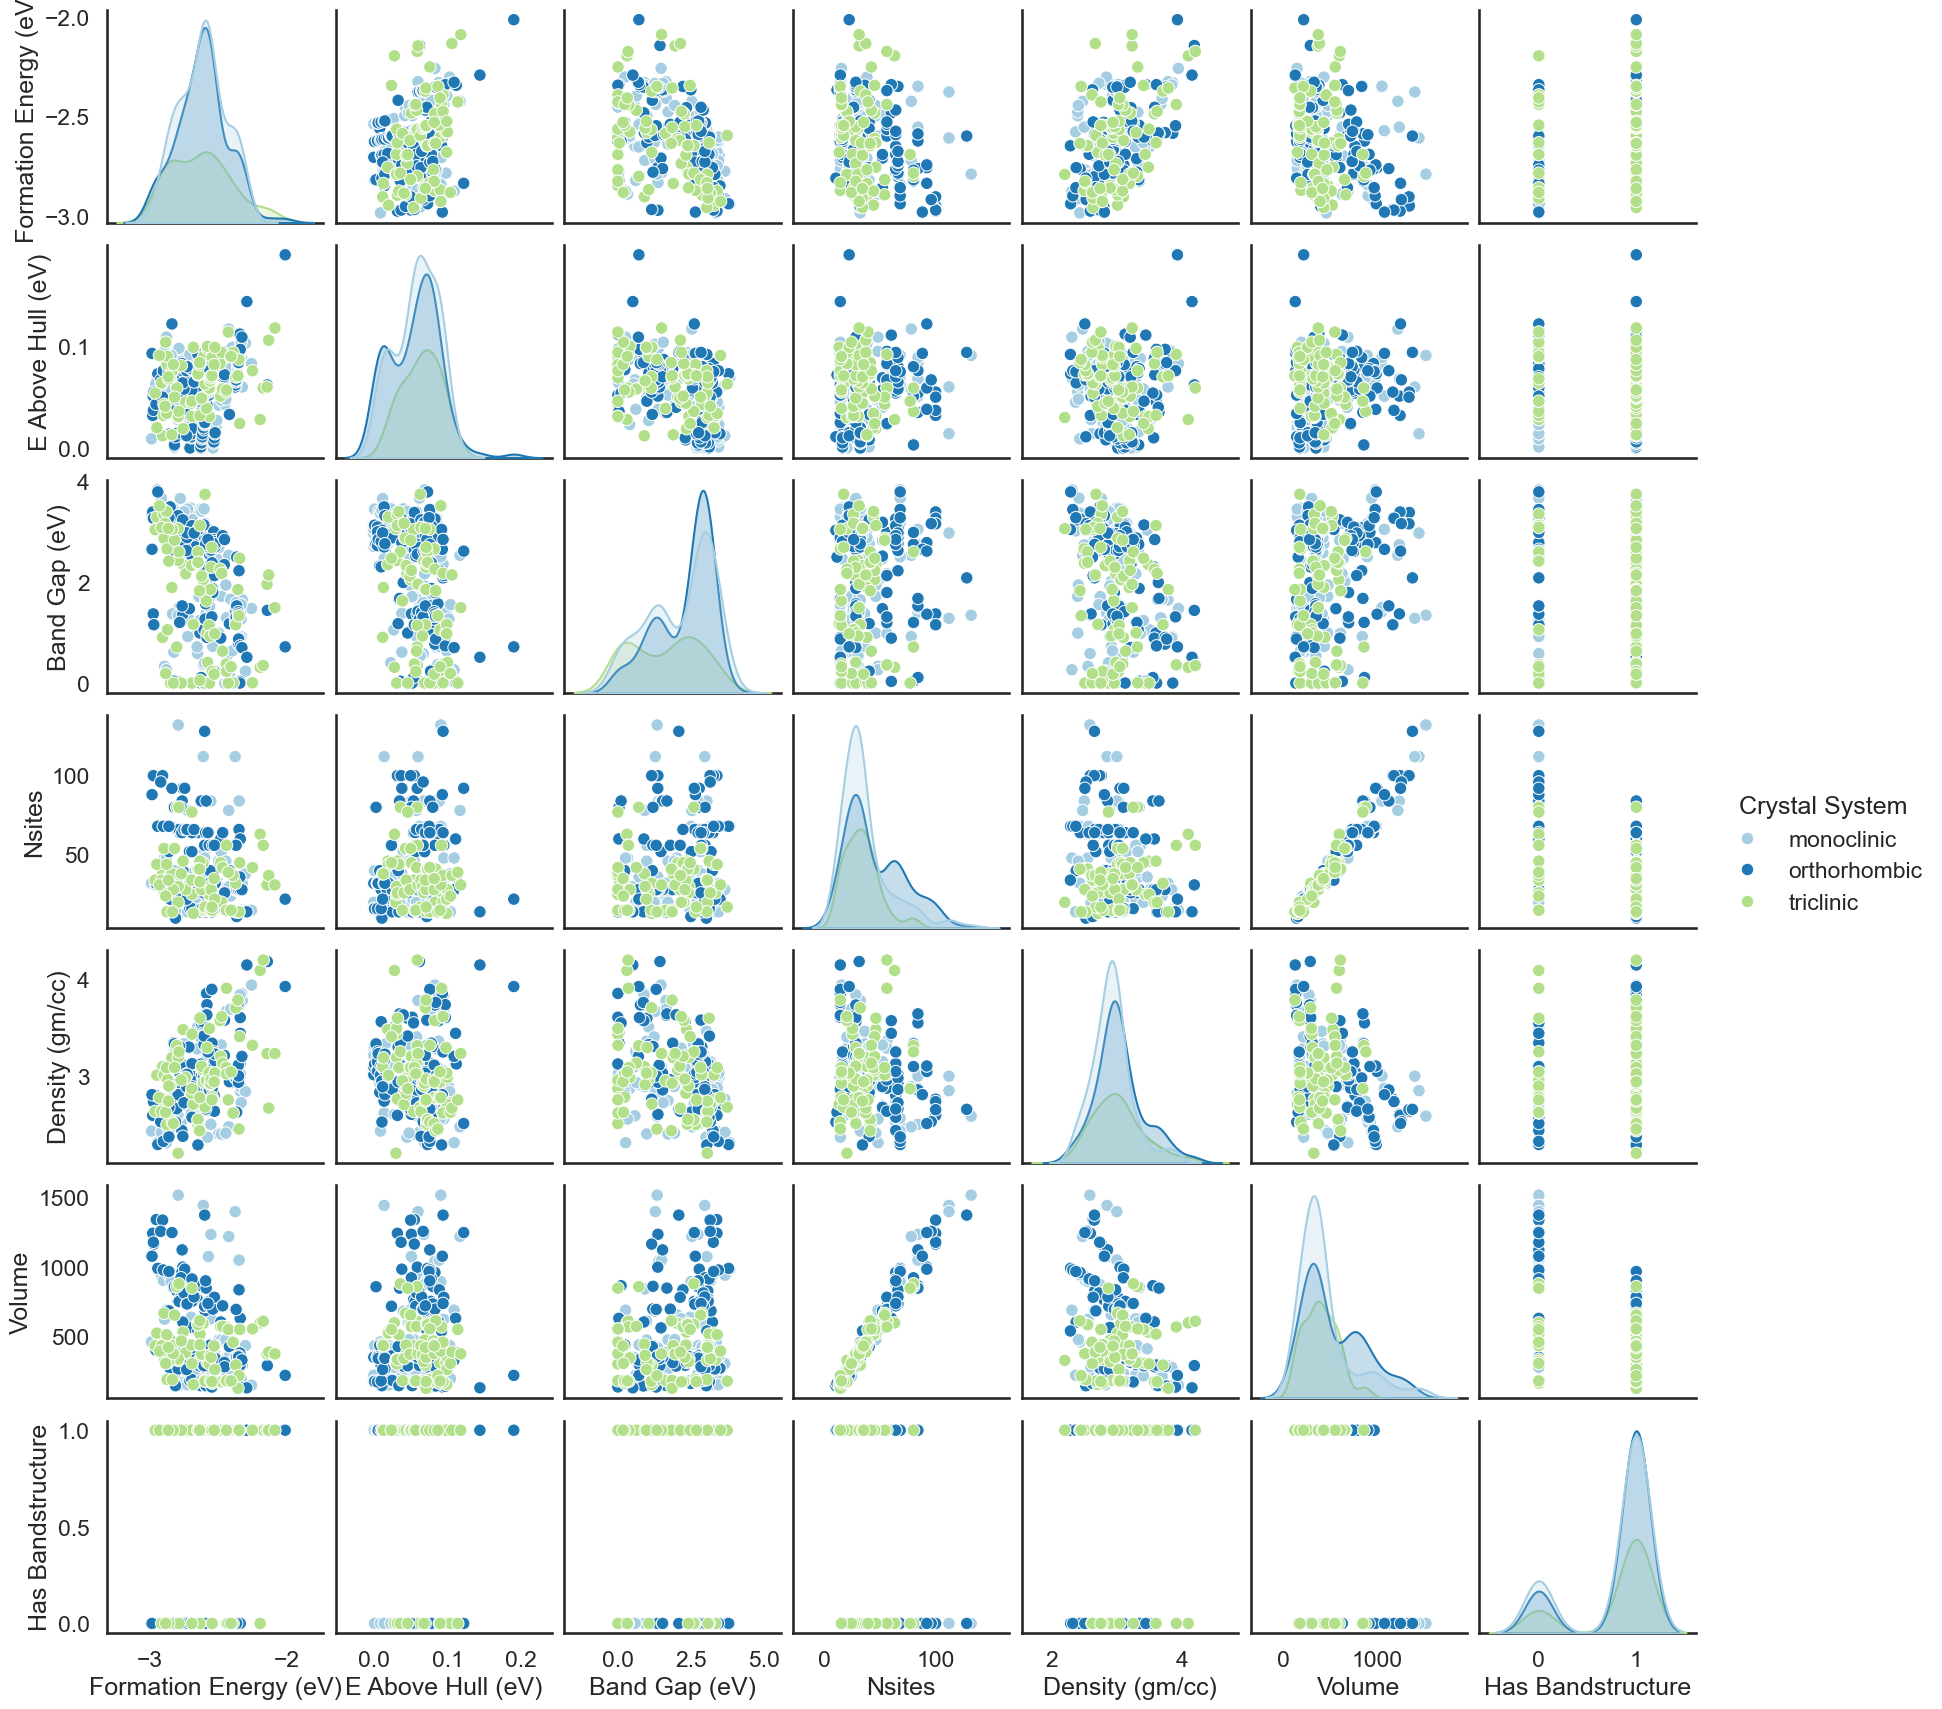

In [140]:
sns.set_context('talk')
sns.set_palette('Paired')
sns.set_style('white')

sns.pairplot(df, hue='Crystal System')

Create a bar plot showing the correlations between each column and y

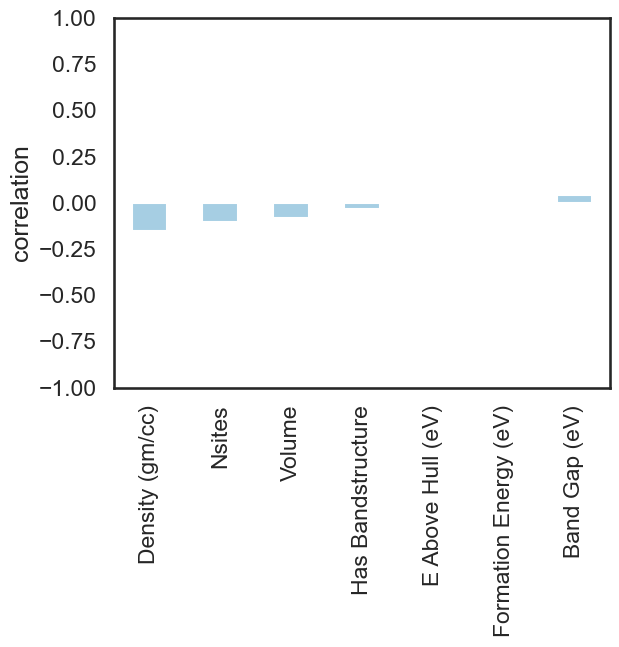

In [141]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='correlation');

In [142]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = df[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['Nsites', 'Density (gm/cc)'], dtype='object')
Index(['Nsites_scaled', 'Density (gm/cc)_scaled'], dtype='object')


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


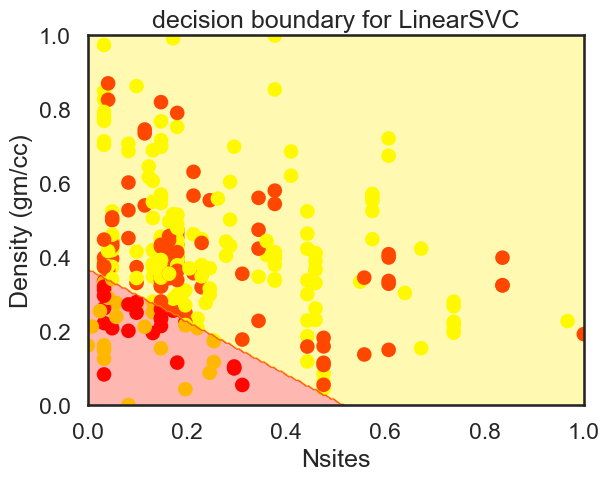

In [143]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

# Conclusion
Since there are three crystal systems that the Li-ion batteries can be categorized into, the problem has become a multiclass classification. A multiclass classification makes the assumption that each sample is assigned to one and only one label, therefore, the battery can either be monoclinic, orthorhombic or triclinic, but it cannot be both at the same time. The dataset is also imbalanced such that there are 139 monoclinic batteries, 128 orthorhombic batteries and 72 triclinic batteries giving a 41:38:21 ratio. Because the dataset is biased towards the monoclinic batteries, the model overfits on that class label and predicts it with high accuracy, leaving the orthorhombic class with medium accuracy and the triclinic class with the lowest accuracy.

Comparing the resulting accuracy, precision, recall and F1 score of the models, we could conclude that the random forest produced the best results, followed by the extra random forest, logistic regression, KNN, and the decision tree. This proves that while the decision trees produced the fastest results, it suffered from overfitting and the random forest algorithm which produced the slowest results did not suffer from overfitting by creating trees on random subsets.

# Recommendations
Because the dataset used for the classification problem was imbalanced, it is recommended to re-sample the dataset to make it balanced and standardized. By sampling a balanced dataset, the resulting metrics would be improved.

# Referrences
Swaminathan, S. (2018, March 15). Logistic Regression Detailed Overview. Retrieved from Towards Data Science: https://towardsdatascience.com/logistic-regression-detailedoverview-46c4da4303b

Gupta, P. (2017, May 18). Decision Trees in Machine Learning. Retrieved from Towards Data Science : https://towardsdatascience.com/decision-trees-in-machinelearning-641b9c4e8052

Donges, N. (2020, September 3). A Complete Guide to the Random Forest Algorithm. Retrieved from Built In: https://builtin.com/data-science/random-forest-algorithm

Ceballos, F. (2019, July 14). An intuitive explanation of random forest and extra trees classifiers. Retrieved from Towards Data Science: https://towardsdatascience.com/an-intuitiveexplanation-of-random-forest-and-extra-trees-classifiers8507ac21d54b

Gandhi, R. (2018, May 27). Introduction to Machine Learning Algorithms: Linear Regression. Retrieved from Towards Data Science: https://towardsdatascience.com/introductionto-machine-learning-algorithms-linear-regression14c4e325882a

Muhajir, I. (2019, April 20). K-Neighbors Regression Analysis in Python. Retrieved from Analytics Vidhya: https://medium.com/analytics-vidhya/k-neighbors-regressionanalysis-in-python-61532d56d8e4